In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import csv, functools, operator,os, re
from datetime import datetime
import pandas as pd
import numpy as np 
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as ani

In [4]:
#Importing the datasets for covid cases in non-US countries 
data_dir = '/Users/jaodand/Dropbox/PostDoc/Jobs:Fellowships/TDI/JHU/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports' # to read all csv files
data_files = functools.reduce(operator.add, [glob(pattern) for pattern in [
    "%s/*.csv*"%data_dir]])

#Sorting the files by dates of generation
data_files.sort(key=lambda f: datetime.strptime(re.split('\.|/',f)[-2], "%m-%d-%Y"))

In [5]:
keys_filenames = [(re.split('\.|/',f)[-2]) for f in data_files]

In [6]:
#Get column names in the latest public datasets from JHU. 
df_exp = pd.read_csv(data_files[-1], sep=',', compression=None, header='infer')
cols = list(df_exp)

In [7]:
#Get the complete public datasets from JHU. 
df = pd.concat(map(functools.partial(pd.read_csv, sep=',',header='infer'), 
                   data_files),join_axes=[df_exp.columns],keys=keys_filenames)

/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  


In [8]:
#col names for concatenated pdf 
Hdrs = list(df)
print(Hdrs)

['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio']


In [9]:
df_Ind = df[df['Country_Region'].str.contains("India", na=False)]

### Temporal change in Covid cases with time across different provinces

/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


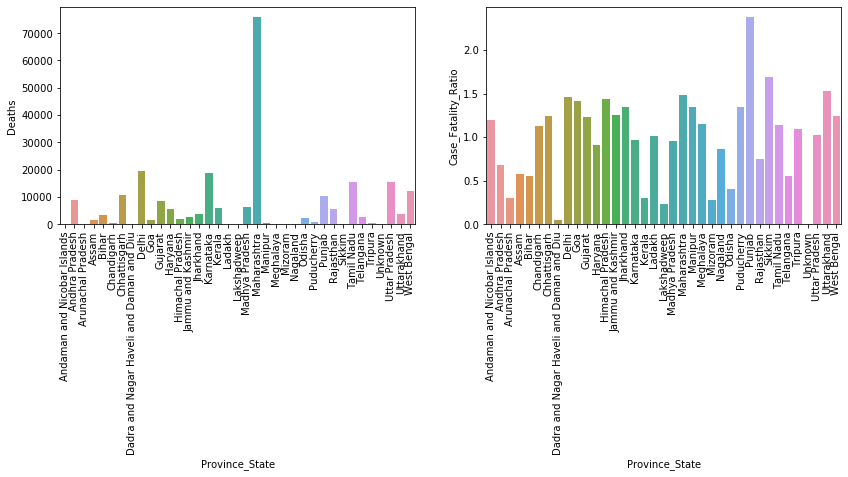

In [26]:
#Lets start with a basic plot for latest data for India
plt.figure()

plt.subplot(1,2,1)
df_exp_Ind = df_exp[df_exp['Country_Region'].str.contains("India", na=False)]
ax = sns.barplot(x="Province_State", y="Deaths", data=df_exp_Ind)


plt.xticks(rotation = 90)

plt.subplot(1,2,2)
df_exp_Ind = df_exp[df_exp['Country_Region'].str.contains("India", na=False)]
ax = sns.barplot(x="Province_State", y="Case_Fatality_Ratio", data=df_exp_Ind)


plt.xticks(rotation = 90)

plt.gcf().set_size_inches(14,4)
plt.savefig('Statewise.pdf')
plt.show()


In [21]:
def buildmebarchart(df):

    
    iv = min(i, len(df.index)-1)
    objects = df.max().index
    y_pos = np.arange(len(objects))
    performance = df.iloc[[iv]].values.tolist()[0]
    
    
    ax = sns.barplot(x="Province_State", y="Deaths", data=df_exp_Ind)

    if bar == 'vertical':
        plt.bar(y_pos, performance, align='center', color=['red', 'green', 'blue', 'orange'])
        plt.xticks(y_pos, objects)
        plt.ylabel('Deaths')
        plt.xlabel('Countries')
        plt.title('Deaths per Country \n' + str(df.index[iv].strftime('%y-%m-%d')))
    else:
        plt.barh(y_pos, performance, align='center', color=['red', 'green', 'blue', 'orange'])
        plt.yticks(y_pos, objects)
        plt.xlabel('Deaths')
        plt.ylabel('Countries')

Traceback (most recent call last):
  File "/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/animation.py", line 953, in _start
    self._init_draw()
  File "/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/animation.py", line 1732, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-21-a56c9a3fb764>", line 13, in buildmebarchart
    plt.barh(y_pos, performance, align='center', color=['red', 'green', 'blue', 'orange'])
  File "/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py", line 2454, in barh
    y, width, height=height, left=left, align=align, 

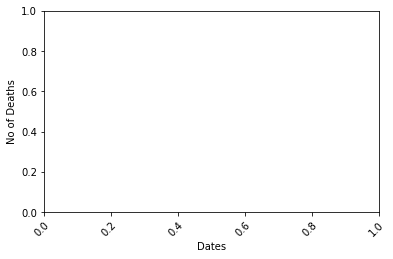

In [23]:
fig = plt.figure()
bar = ''

plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('No of Deaths')
plt.xlabel('Dates')


animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
plt.show()